In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering as AC

In [2]:
crimes = pd.read_csv('data/Chicago_crimes.csv')
crimes.drop(columns=['Unnamed: 0'], inplace=True)
crimes.Date = pd.to_datetime(crimes.Date)
crimes.index = pd.DatetimeIndex(crimes.Date)

rc = {'figure.figsize':(8,4.5),
          'axes.facecolor':'#0e1117',
          'axes.edgecolor': '#0e1117',
          'axes.labelcolor': 'white',
          'figure.facecolor': '#0e1117',
          'patch.edgecolor': '#0e1117',
          'text.color': 'white',
          'xtick.color': 'white',
          'ytick.color': 'white',
          'grid.color': 'grey',
          'font.size' : 8,
          'axes.labelsize': 12,
          'xtick.labelsize': 8,
          'ytick.labelsize': 12}
def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='Reds'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    fig, ax = plt.subplots()
    plt.rcParams.update(rc)
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]), list(df.columns))
    plt.grid(False)
    plt.show(fig)
    
def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.values), np.abs(np.min(df_marginal_scaled.values))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

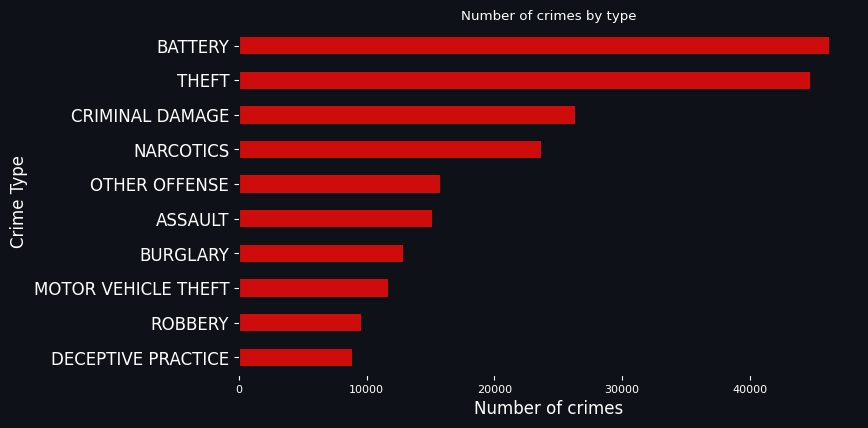

In [3]:
# 根据时间段查看各案件分布
slot = 'Night'
crimes_slot = crimes[crimes['Slot'] == slot]

plt.rcParams.update(rc)
fig, ax = plt.subplots()
crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh', color='#cf0c0c')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show(fig)

In [4]:
# 惊人的结论
crimes.Slot.value_counts()

Slot
3    66764
2    64252
1    51960
0    31728
Name: count, dtype: int64

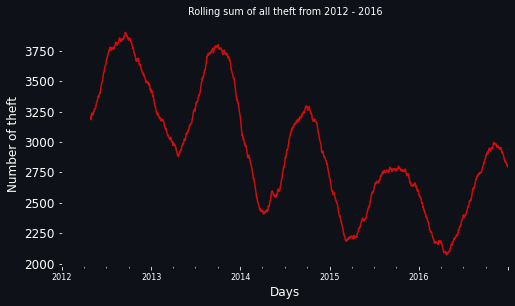

In [6]:
# 根据案件类型显示该类型案件的滚动求和
crime_type = 'THEFT'
sub_crimes= crimes[crimes['Primary Type']==crime_type]
plt.rcParams.update(rc)
fig, ax = plt.subplots()
sub_crimes.resample('D').size().rolling(120).sum().plot(color='#cf0c0c')
plt.title('Rolling sum of all theft from 2012 - 2016')
plt.ylabel('Number of theft')
plt.xlabel('Days')
plt.show(fig)

In [7]:
hour_by_location = crimes.pivot_table(values='ID', index='Location Description', columns=crimes.index.hour, aggfunc=np.size).fillna(0)
hour_by_type = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.hour, aggfunc=np.size).fillna(0)

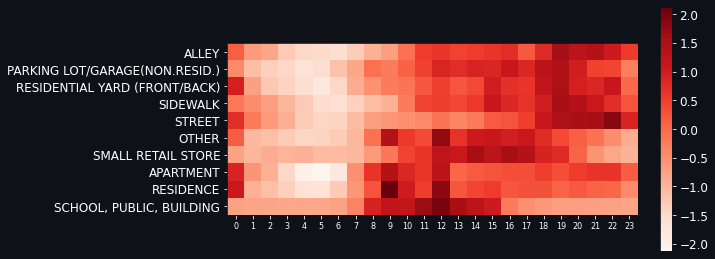

In [8]:
scale_and_plot(hour_by_location)

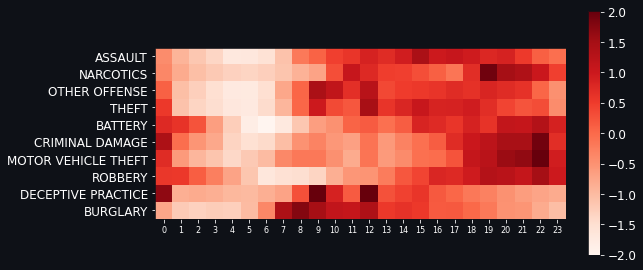

In [9]:
scale_and_plot(hour_by_type)